In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [2]:
gridsearch_df_root = "./ex3_convnet_gridsearch_results_complete.csv"
gridsearch_data = pd.read_csv(gridsearch_df_root, sep = ";")

In [3]:
gridsearch_data.head()

,num_epochs,batch_size,hidden_size,learning_rate,lr_decay,reg,norm_layer,history_loss_train,history_loss_validation,best_model_valid_accuracy,early_stopped_valid_accuracy,is_early_stopped,train_valid_loss_hist_plot_path,valid_accuracy_plot_path,path_pre_train_filter_plots,path_post_train_filter_plots,best_model_test_accuracy,early_stopped_best_accuracy
0,5,200,"[128, 512, 512, 512, 512]",0.001,0.99,0.001,BN,"[0.007317387554110313, 0.005488692297011006, 0...","[0.005892492294311523, 0.005774666547775268, 0...",74.8,NaN,False,./train_valid_history_plots/train_val_loss_his...,./valid_accuracy_history_plots/valid_accuracy_...,./pre_training_filters/pre_training_filters_5_...,./post_training_filters/post_training_filters_...,71.4,NaN
1,5,200,"[128, 512, 512, 512, 512]",0.001,0.99,0.005,BN,"[0.007744611178125654, 0.006332800025842628, 0...","[0.007573357820510864, 0.0062691552639007565, ...",65.4,NaN,False,./train_valid_history_plots/train_val_loss_his...,./valid_accuracy_history_plots/valid_accuracy_...,./pre_training_filters/pre_training_filters_5_...,./post_training_filters/post_training_filters_...,61.5,NaN
2,5,200,"[128, 512, 512, 512, 512]",0.001,0.95,0.001,BN,"[0.007281886300262139, 0.0054230589599025495, ...","[0.0062059093713760375, 0.005219739377498627, ...",70.2,NaN,False,./train_valid_history_plots/train_val_loss_his...,./valid_accuracy_history_plots/valid_accuracy_...,./pre_training_filters/pre_training_filters_5_...,./post_training_filters/post_training_filters_...,69.8,NaN
3,5,200,"[128, 512, 512, 512, 512]",0.001,0.95,0.005,BN,"[0.0075684450791806595, 0.006249443260990844, ...","[0.006689612865447998, 0.005400641083717346, 0...",68.1,NaN,False,./train_valid_history_plots/train_val_loss_his...,./valid_accuracy_history_plots/valid_accuracy_...,./pre_training_filters/pre_training_filters_5_...,./post_training_filters/post_training_filters_...,68.9,NaN
4,5,200,"[128, 512, 512, 512, 512]",0.001,0.90,0.001,BN,"[0.007461748831126155, 0.0055135272826467244, ...","[0.005386924386024475, 0.005775095701217652, 0...",75.6,NaN,False,./train_valid_history_plots/train_val_loss_his...,./valid_accuracy_history_plots/valid_accuracy_...,./pre_training_filters/pre_training_filters_5_...,./post_training_filters/post_training_filters_...,70.5,NaN


In [4]:
best_row = gridsearch_data.loc[gridsearch_data.best_model_test_accuracy.argmax()]

In [5]:
pd.DataFrame(best_row)

,77
num_epochs,30
batch_size,200
hidden_size,"[128, 512, 512, 512, 512]"
learning_rate,0.001
lr_decay,0.9
reg,0.005
norm_layer,BN
history_loss_train,"[0.0076387940985815864, 0.006173134520345805, ..."
history_loss_validation,"[0.00870623242855072, 0.005963669896125794, 0...."
best_model_valid_accuracy,85.6


## Filter Visualization. 

---

Pre-training:

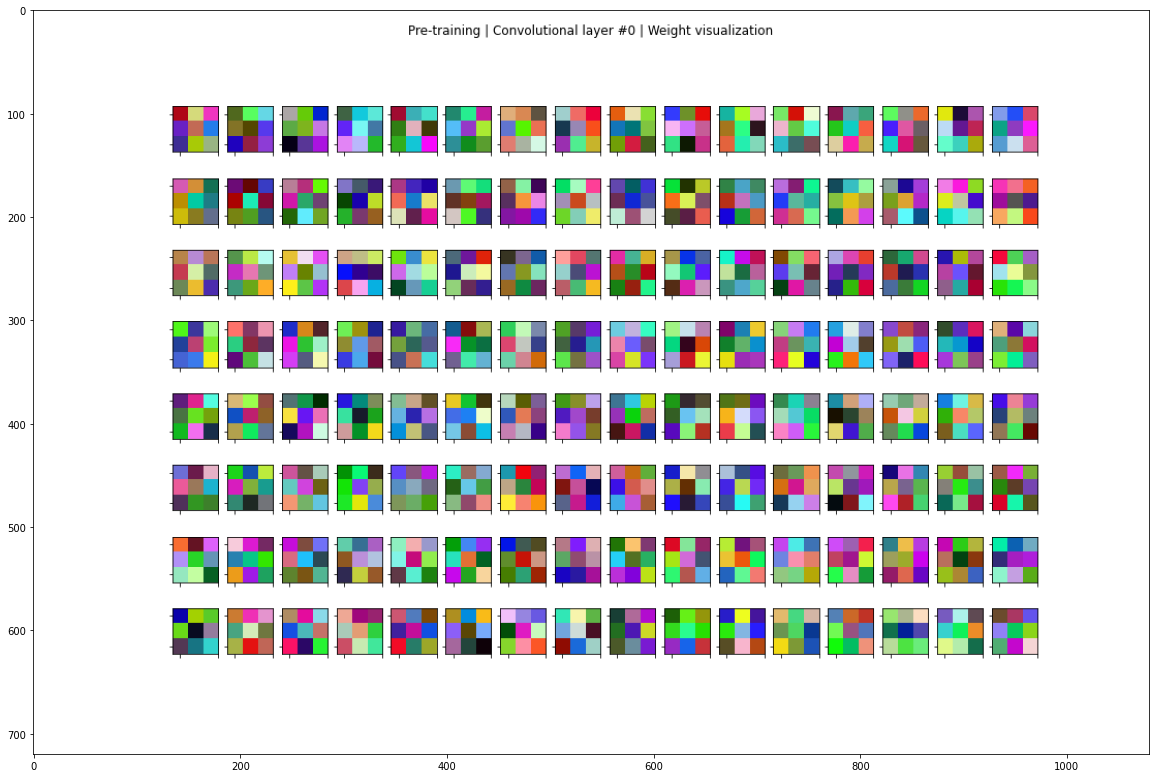

In [6]:
fig, ax = plt.subplots(figsize = (20, 15))
ax.imshow(Image.open(best_row.path_pre_train_filter_plots))
plt.show()

Post-training:

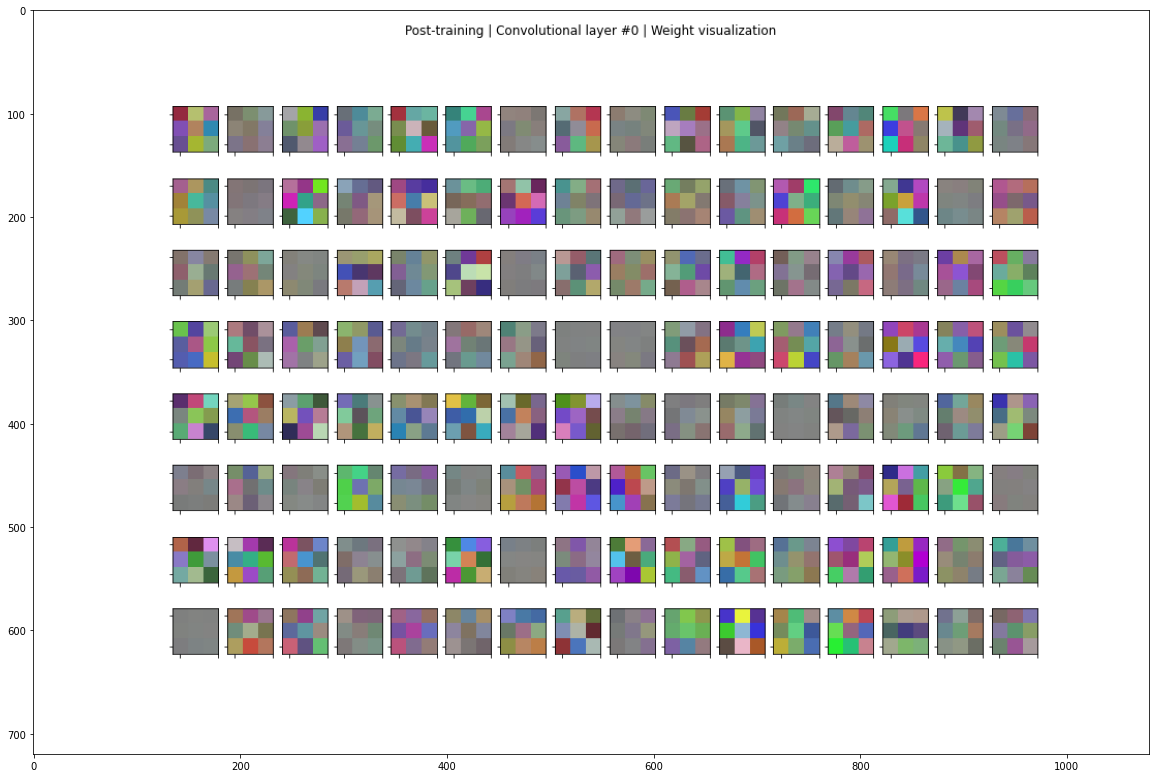

In [7]:
fig, ax = plt.subplots(figsize = (20, 15))
ax.imshow(Image.open(best_row.path_post_train_filter_plots))
plt.show()

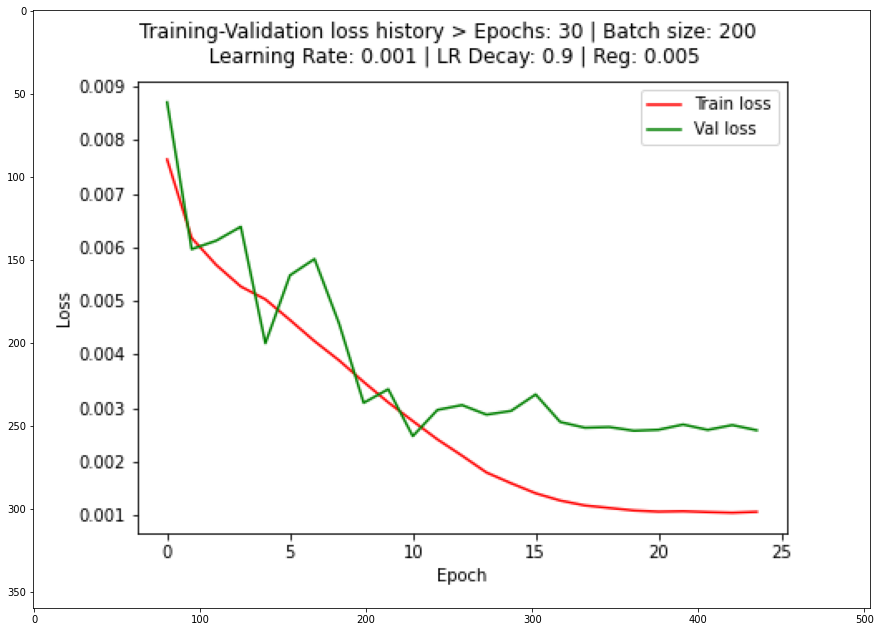

In [9]:

fig, ax = plt.subplots(figsize = (15, 15))
ax.imshow(Image.open(best_row.train_valid_loss_hist_plot_path))
plt.show()

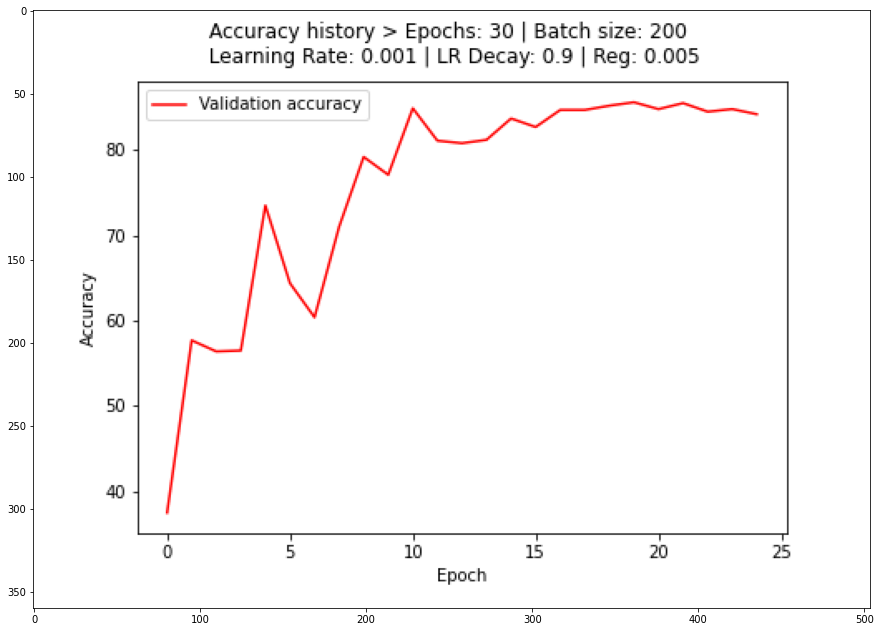

In [10]:

fig, ax = plt.subplots(figsize = (15, 15))
ax.imshow(Image.open(best_row.valid_accuracy_plot_path))
plt.show()

In [11]:
"""
Created on Thu Nov 11 17:09:22 2021

@author: marco
"""

import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import numpy as np

import matplotlib.pyplot as plt

from ex3_convnet_utils import get_dataset_loaders, weights_init, PrintModelSize, VisualizeFilter
from ex3_convnet_utils import ConvNet
from ex3_convnet_utils import complete_training_and_validation
from ex3_convnet_utils import test_model

import pandas as pd

gridsearch_data_default_path = "ex3_convnet_gridsearch_results_complete.csv"
train_valid_plot_root = "./train_valid_history_plots/"
valid_accuracy_history_root = "./valid_accuracy_history_plots/"
pre_training_filters_root = "./pre_training_filters/"
post_training_filters_root = "./post_training_filters/"

gridsearch_data = pd.DataFrame()

try:
    gridsearch_data = pd.read_csv(gridsearch_data_default_path, sep = ';', index_col = None)
    print("Number of lines in csv: ", len(gridsearch_data))
    
except Exception as E:
    print(E)
    print("No worries! Seems like this is the first run, or maybe the file is actually not there.")


Number of lines in csv:  144


Starting training now...
Using device: cpu
Conv2d(3, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))


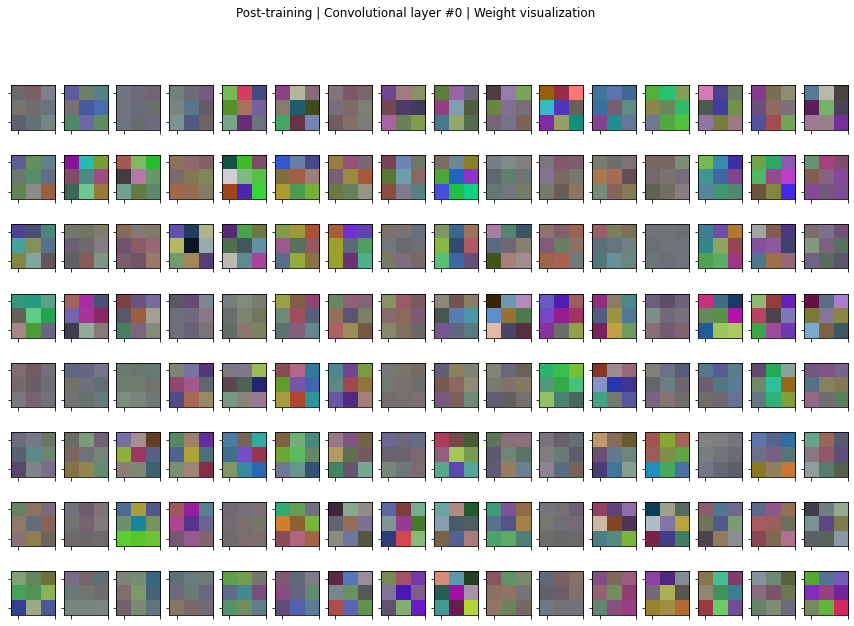

In [12]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

index_last_checkpoint = len(gridsearch_data.index) # Will use this to get to the last permutation of hyperparameters
    
    
cols = ['num_epochs', 'batch_size', 'hidden_size', 'learning_rate', 'lr_decay', 'reg', 'norm_layer', 
        'history_loss_train', 'history_loss_validation', 'best_model_valid_accuracy', 'early_stopped_valid_accuracy', 'is_early_stopped', 'train_valid_loss_hist_plot_path',
        'valid_accuracy_plot_path', 'path_pre_train_filter_plots', 'path_post_train_filter_plots', 'best_model_test_accuracy', 'early_stopped_best_accuracy']



''' DATA LOADING '''

data_aug_transforms = []
#data_aug_transforms.append(transforms.ColorJitter(brightness=.5, hue=.05, saturation=.05))
#data_aug_transforms.append(transforms.RandomPerspective(distortion_scale=0.6, p=1.0))
#data_aug_transforms.append(transforms.RandomHorizontalFlip(p=0.3))
#data_aug_transforms.append(transforms.RandomRotation(20))
#data_aug_transforms.append(transforms.RandomInvert(p=0.2))

''' END OF DATA LOADING '''

input_size = 3
num_classes = 10
hidden_size = [128, 512, 512, 512, 512]
num_training = 49000
num_validation = 1000
norm_layer = 'BN'


num_epochs_gs = [5, 10, 30, 50]
batch_size_gs = [200, 400]
learning_rate_gs = [1e-3, 2e-3, 1e-2]
learning_rate_decay_gs = [0.99, 0.95, 0.9]
reg_gs = [0.001, 0.005]

num_epochs = 30
batch_size = 200
learning_rate = 0.001
learning_rate_decay = 0.9
reg = 0.005

print("Starting training now...")

load_from_disk = True
device = 'cpu'#torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print('Using device: %s'%device)

current_iteration = 0

train_loader, val_loader, test_loader = get_dataset_loaders(data_aug_transforms,
                                    batch_size,
                                    num_training, 
                                    num_validation)


model = ConvNet(input_size, hidden_size, num_classes, norm_layer=norm_layer).to(device)

if load_from_disk == False:

    model.apply(weights_init)

    # Model size and filters before training (model size does not change)
    PrintModelSize(model)

    full_path_pre_train_filter_plots = str(pre_training_filters_root + str("pre_training_filters_{}_{}_{}_{}_{}.png".format(num_epochs, batch_size, learning_rate,
                                                                                          learning_rate_decay, reg)))

    VisualizeFilter(model, full_path_pre_train_filter_plots, save_to_disk = False, prefix = "Pre-training | ")


    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=reg)



    results = complete_training_and_validation(model = model,
                                num_epochs = num_epochs,
                                train_loader = train_loader,
                                val_loader = val_loader,
                                device = device,
                                learning_rate = learning_rate,
                                learning_rate_decay = learning_rate_decay,
                                reg = reg,
                                batch_size = batch_size)


    best_model = results[0]
    early_stopped_model = results[1]
    loss_train = results[2]
    loss_val = results[3]
    best_model_accuracy = results[4]
    early_stopped_accuracy = results[5]
    is_early_stopped = results[6]
    accuracy_val = results[7]

    best_model_test_accuracy = np.nan
    early_stopped_test_accuracy = np.nan

    print("Early stopped flag: ", is_early_stopped)

    if best_model != None:
        best_model_test_accuracy = test_model(best_model, test_loader, device)
        print("Best model test accuracy: ", best_model_test_accuracy)

    if early_stopped_model != None:
        early_stopped_test_accuracy = test_model(early_stopped_model, test_loader, device)
        print("Early stopped test accuracy: ", early_stopped_test_accuracy)




    full_path_post_train_filter_plots = str(post_training_filters_root + str("post_training_filters_{}_{}_{}_{}_{}.png".format(num_epochs, batch_size, learning_rate,
                                                                                          learning_rate_decay, reg)))

    VisualizeFilter(model, full_path_post_train_filter_plots, save_to_disk = False, prefix = "Post-training | ")
else:
    
    DEFAULT_BEST_MODEL_PATH = './best_model_weights.bin'

    checkpoint = torch.load(DEFAULT_BEST_MODEL_PATH) # This could fail due to out-of-memory.
    model.load_state_dict(checkpoint["state_dict"])
    VisualizeFilter(model, "", save_to_disk = False, prefix = "Post-training | ")
